In [97]:
# importing the libraries
import networkx as nx
from stochastic import *
import numpy as np

In [98]:
#creating the first graph
G = nx.Graph()
for i in range(20):
    G.add_node(i)
for i in range(20):
    G.add_edge(i, (i+1)%20)
    G.add_edge(i, (i+5)%20)

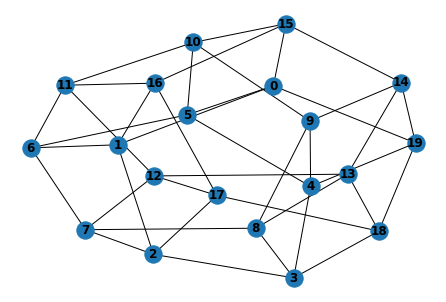

In [99]:
nx.draw(G, with_labels=True, font_weight='bold')

In [100]:
#creating the second graph
G1 = nx.Graph()
for i in range(20):
    G1.add_node(i)
for i in range(20):
    G1.add_edge(i, (i+3)%20)
    G1.add_edge(i, (i+6)%20)

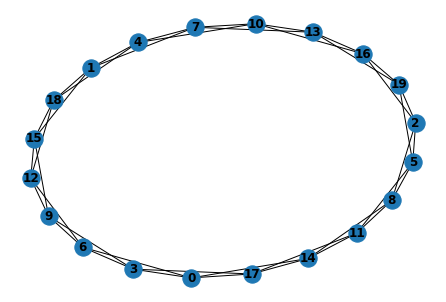

In [51]:
nx.draw(G1, with_labels=True, font_weight='bold')

In [101]:
sbm_P_true = np.eye(20) #the first graph is in the correct order so, it permutation is the identity matrix
G.remove_nodes_from(nx.isolates(G)) # removing 0 degree nodes from the graph
n = len(G)
l1 = nx.laplacian_matrix(G, range(n))
l1 = np.array(l1.todense())
G1.remove_nodes_from(nx.isolates(G1))
m = len(G1)
l2 = nx.laplacian_matrix(G1, range(m)) 
l2 = np.array(l2.todense())
sbm_G = np.double(l1)
sbm_G1 = np.double(l2)

[Epoch    1/600] loss: 1.893496 - std: 10.022490
[Epoch  100/600] loss: 1.335331 - std: 8.678001
[Epoch  200/600] loss: 1.016672 - std: 6.061933
[Epoch  300/600] loss: 0.831542 - std: 5.046855
[Epoch  400/600] loss: 0.684117 - std: 4.357987
[Epoch  500/600] loss: 0.595666 - std: 3.911042
[Epoch  600/600] loss: 0.577337 - std: 3.800017


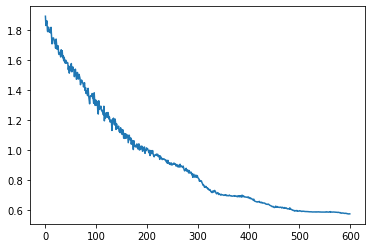

In [102]:
sbm_G_inv, sbm_G1_inv, sbm_P = find_permutation(sbm_G, sbm_G1, it=10, tau=2, n_samples=40, epochs=600, lr=0.5, 
                                               loss_type = 'w', alpha = 0.1, ones = True)
#sbm_P will contain the permutation of G1 that matches the closest with G

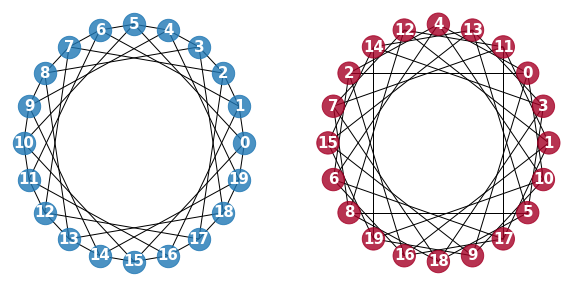

In [103]:
plot_graphs_ch(sbm_G, sbm_G1, sbm_P_true, sbm_P)

In [104]:
permutation = []
for i in range(sbm_P.shape[0]):
    for j in range(sbm_P.shape[1]):
        if sbm_P[i][j] == 1:
            permutation.append(j)
print(permutation)
# converting sbm_P from a matrix to a list of node labels

[2, 0, 8, 1, 5, 18, 11, 9, 12, 16, 19, 3, 6, 4, 7, 10, 14, 17, 15, 13]


In [105]:
# adjacency matrices for G and G1. Note that we have permuted the adjacency matrix for G1
g = nx.adjacency_matrix(G).todense()
g1_init = nx.adjacency_matrix(G1).todense()[permutation, :]

In [106]:
# This gives a measure of how different is closest match of G1 from G using the frobenius norm
diff = g - g1_init
np.linalg.norm(diff)

11.045361017187261

In [ ]:
'''
without initialization (for undirected graphs):
    1) reduce the dimensions of the nodes from 20 to suppose 5 (N -> d)
    2) Do top K-NN for each node (K = 4 - #current_neighbours). 
    3) Get the adjacency matrix of this graph and calculate the frobenius norm with the original matrix.
    4) This number gives us an idea of the performance of our dimensionality reduction.   
    5) Using this as the loss, train on the weights (d dimensional vector representations of the nodes)
    
    NOTE: Also note the time taken for this entire process.

with initialization (for undirected graphs):
    Everything remains same, except that in the 3rd step, do a graph alignment with original graph before storing the adjacency matrix
'''

In [ ]:
#using SVD for matrix factorization of adjacency matrix of G1. This will compute 5 dimensional representation of G1 nodes.

In [107]:
u, s, vh = np.linalg.svd(g1_init) 

In [121]:
s_desc_idx = np.flip(np.argsort(s))
v_5 = vh[s_desc_idx[0:5], :].T
g1_init_centered = g1_init - np.mean(g1_init, axis=0)
g1_embeddings_5 = g1_init_centered @ v_5

In [124]:
print(g1_embeddings_5)

[[-2.43076972e-16 -3.43987900e-01 -1.05868590e+00  3.96420207e-01
  -5.79634595e-01]
 [-5.02530595e-17  1.11316823e+00  4.16981298e-17  6.27550134e-01
  -3.15227947e-02]
 [-5.22097845e-16  3.43987900e-01 -1.05868590e+00 -7.66285097e-01
  -5.21230145e-01]
 [ 6.07692429e-17 -6.54303868e-01  9.00572015e-01 -6.94477675e-02
  -5.56233341e-01]
 [-3.54099274e-16 -5.41161516e-16 -1.11316823e+00 -6.27550134e-01
   3.15227947e-02]
 [-2.16786513e-16 -3.43987900e-01  1.05868590e+00 -7.66285097e-01
  -5.21230145e-01]
 [-1.89030938e-16  6.54303868e-01 -9.00572015e-01 -6.94477675e-02
  -5.56233341e-01]
 [-5.02530595e-17  6.54303868e-01  9.00572015e-01  3.27133010e-01
  -5.76154194e-01]
 [ 1.16280394e-16  3.43987900e-01  1.05868590e+00  3.96420207e-01
  -5.79634595e-01]
 [-3.54099274e-16 -9.00572015e-01 -6.54303868e-01  6.94477675e-02
   5.56233341e-01]
 [-3.27808816e-16 -6.54303868e-01 -9.00572015e-01  3.27133010e-01
  -5.76154194e-01]
 [ 6.85269694e-16  1.05868590e+00  3.43987900e-01  7.66285097e-01